In [1]:
import pleasy
from scipy.optimize import fsolve

import drops, utilities, waves, wave_reflection, vertical, constants

%matplotlib notebook

Impact   t:  0.01282 vz: -0.126, sz: 0.0
Exit   t  :0.02004 vz: 0.053
Impact   t:  0.0307 vz: -0.051, sz: 0.0
Exit   t  :0.03483 vz: 0.083
Impact   t:  0.0521 vz: -0.086, sz: 0.0
Exit   t  :0.05804 vz: 0.131
Impact   t:  0.08539 vz: -0.138, sz: 0.0
Exit   t  :0.09621 vz: 0.111
Impact   t:  0.11838 vz: -0.106, sz: 0.0


<IPython.core.display.Javascript object>


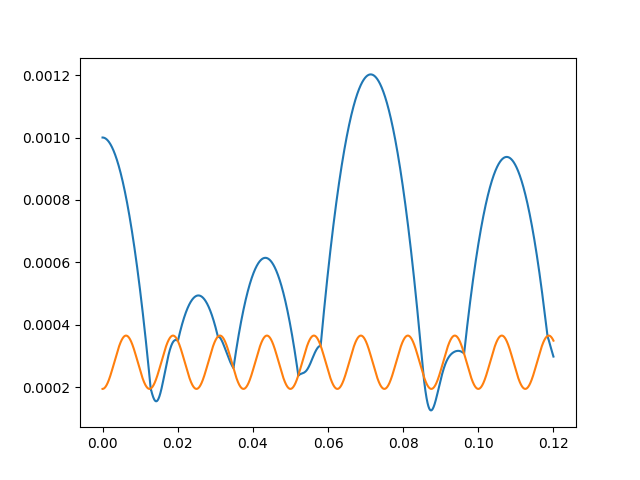

In [2]:
t = linspace(0, .12, 10000)

soln, impacts = drops.ode_standalone(t, corral=False)

z = soln[:, 0, 2]

fig, ax = plt.subplots()
ax.plot(t, z)
ax.plot(t, drops.surface_oscilation(t)[0] + constants.R_0)

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


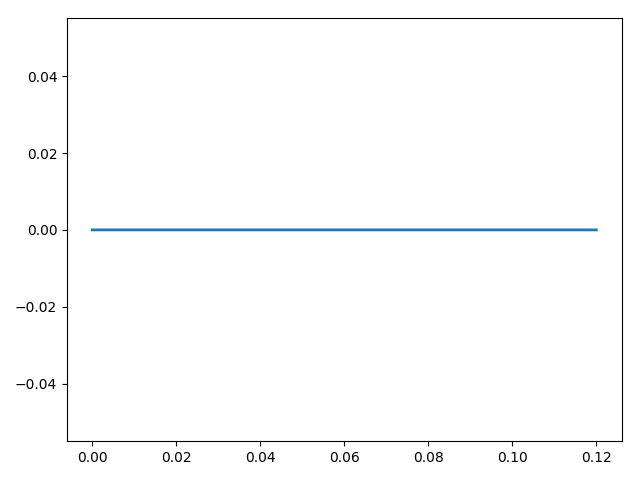

In [3]:
sx = soln[:, 0, 0]
sy = soln[:, 0, 1]

vx = soln[:, 0, 3]
vy = soln[:, 0, 4]

print(vx)

pleasy.plot(t, sy)

<IPython.core.display.Javascript object>


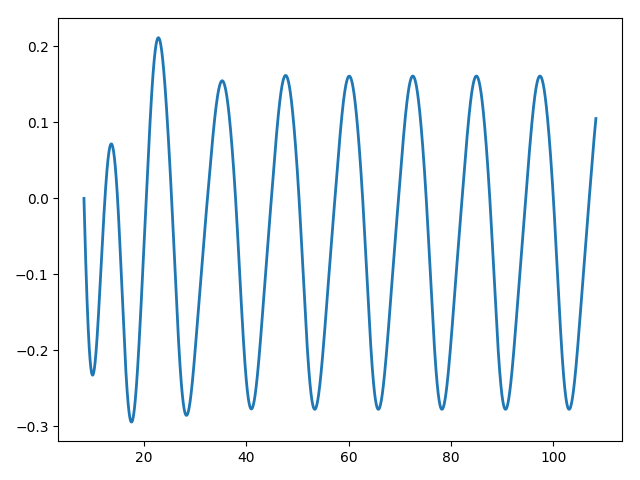

<IPython.core.display.Javascript object>


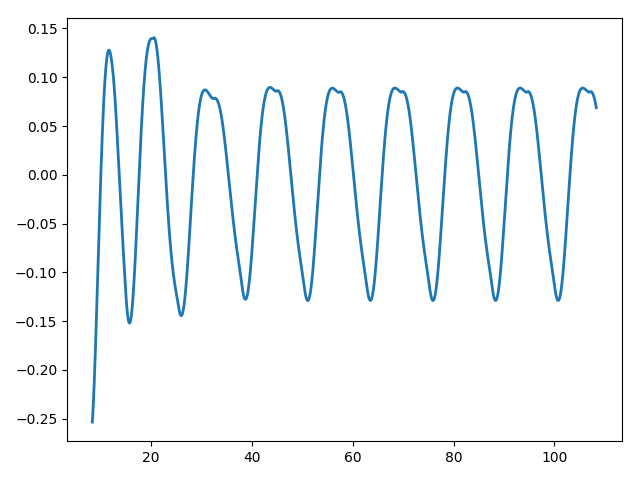

In [4]:
# Demonstrate the logarithmic spring model of the drop's vertical motion during contact with the bath.
t = linspace(0, .08, 10000)
τ = t * drops.ω_D

contact_τ = linspace(8.31729596928, 108.3172959693, int(1e5))
# τ += 1.46
contact_t = contact_τ / constants.ω_D

vz = -0.140045810331

soln2 = vertical.log_spring(contact_τ, vz)

Z, v = soln2[:, 0], soln2[:, 1]

pleasy.plot(contact_τ, Z)
pleasy.plot(contact_τ, v)

<IPython.core.display.Javascript object>


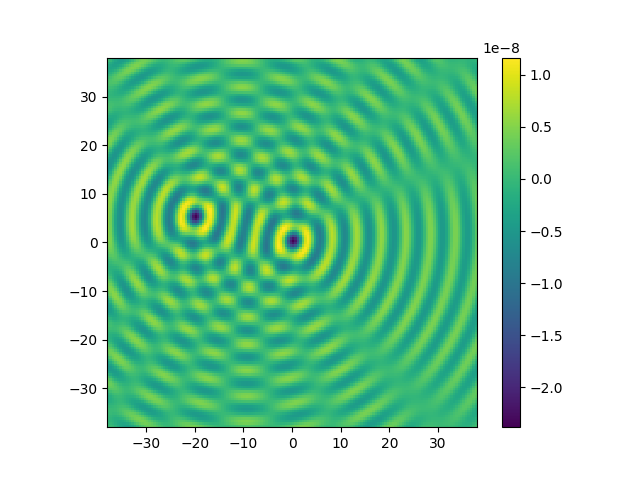

<IPython.core.display.Javascript object>


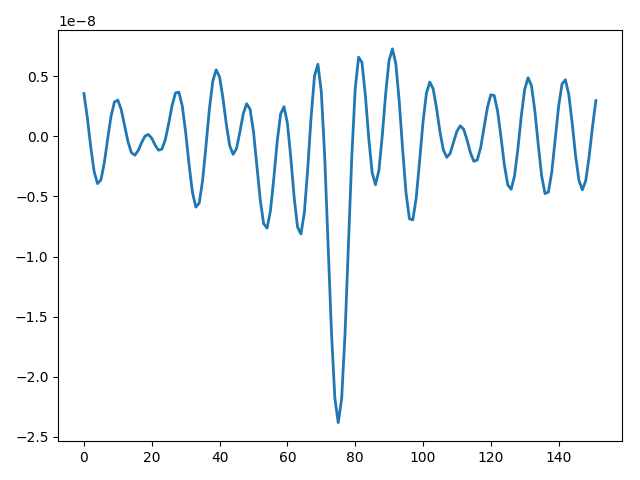

In [5]:
imps = [drops.Impact(0., 0., 0., 5.), drops.Impact(0., -20., 5., 5.)]
        
    
a = utilities.wave_field(.01, imps, resolution=2, plot=True, corral=False)

pleasy.plot(a[:, int(a.shape[1]/2)])